In [41]:
from dataloader import *
from VAE import *
from scores import *
from train import *
from cal_score import cal_bleu, cal_gaussian

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import random

In [33]:
model = torch.load('./models/')
model

CondVAE(
  (encoder_condition_embedding): Embedding(4, 8)
  (encoder): EncoderRNN(
    (embedding): Embedding(28, 264)
    (lstm): LSTM(264, 264)
  )
  (fc_mu): Linear(in_features=264, out_features=32, bias=True)
  (fc_logvar): Linear(in_features=264, out_features=32, bias=True)
  (fc_extend_latent): Linear(in_features=32, out_features=256, bias=True)
  (decoder_condition_embedding): Embedding(4, 8)
  (decoder): DecoderRNN(
    (embedding): Embedding(28, 264)
    (lstm): LSTM(264, 264)
    (out): Linear(in_features=264, out_features=28, bias=True)
  )
)

In [38]:
cal_bleu(model, print_result=True)

---------------------------------
input :  abandon
target:  abandoned
pred  :  abandoned
---------------------------------
input :  abet
target:  abetting
pred  :  abetting
---------------------------------
input :  begin
target:  begins
pred  :  begains
---------------------------------
input :  expend
target:  expends
pred  :  openes
---------------------------------
input :  sent
target:  sends
pred  :  sents
---------------------------------
input :  split
target:  splitting
pred  :  spiling
---------------------------------
input :  flared
target:  flare
pred  :  flare
---------------------------------
input :  functioning
target:  function
pred  :  futticker
---------------------------------
input :  functioning
target:  functioned
pred  :  funtered
---------------------------------
input :  healing
target:  heals
pred  :  heals
Average BLEU-4 score =  0.5148561624699004


0.5148561624699004

In [39]:
score = cal_gaussian(model, print_result =True)

['fame', 'fames', 'famering', 'feaeded']
['spocep', 'spoceps', 'spoupping', 'spoupped']
['sother', 'sothers', 'sothering', 'softered']
['enacl', 'enacls', 'enacling', 'enalled']
['lighten', 'lights', 'lighting', 'lightened']
['obtain', 'obtainsa', 'obtainizing', 'obtained']
['sovert', 'soverts', 'soverting', 'soverted']
['hink', 'hinks', 'hinkling', 'hilched']
['embler', 'emblers', 'emblering', 'embraced']
['drip', 'drips', 'dripping', 'dripped']
['finder', 'finders', 'findering', 'forewoned']
['burish', 'burishes', 'burishing', 'burished']
['exhase', 'exhases', 'exhasing', 'exhased']
['dashise', 'dashises', 'dashiing', 'dishised']
['discuss', 'discusses', 'discusing', 'dispounded']
['reason', 'reasons', 'reasoning', 'reasoned']
['releave', 'releaves', 'releaving', 'releved']
['comment', 'comments', 'commenting', 'commented']
['unlowl', 'unlowls', 'unlowledgin', 'unlowed']
['preturk', 'preturks', 'preturning', 'prattered']
['converwan', 'converwanges', 'converwanging', 'converted']
['g

In [42]:
ce_list = torch.load('./loss_lists/ce_loss/ce_cyclical_0816')
kld_list = torch.load('./loss_lists/kld_loss/kld_cyclical_0816')
bleu = torch.load('./loss_lists/bleu_list/bleu_cyclical_0816')

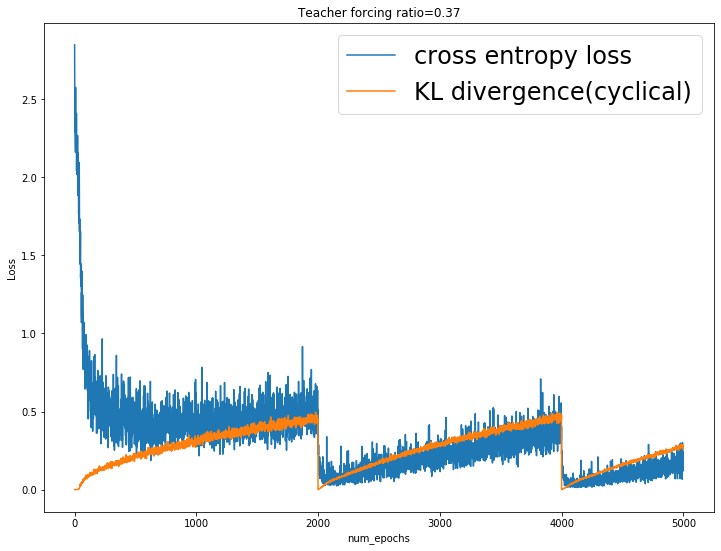

In [47]:
plt.figure(figsize=(12,9))
plt.title('Teacher forcing ratio=0.37')
plt.plot(ce_list, label='cross entropy loss')
plt.plot(kld_list, label='KL divergence(cyclical)')
plt.xlabel('num_epochs')
plt.ylabel('Loss')
plt.legend(fontsize=24)
plt.show()

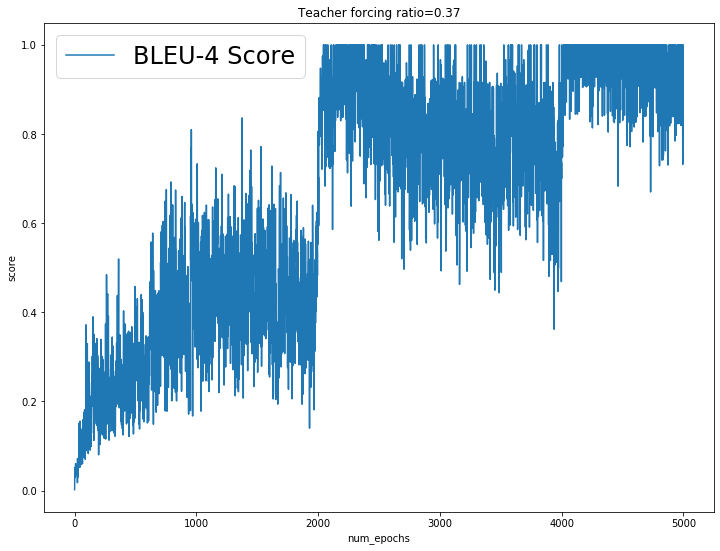

In [48]:
plt.figure(figsize=(12,9))
plt.title('Teacher forcing ratio=0.37')
plt.plot(bleu, label='BLEU-4 Score')
plt.xlabel('num_epochs')
plt.ylabel('score')
plt.legend(fontsize=24)
plt.show()